In [44]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import boston_housing

In [45]:
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [46]:
train_data.shape

(404, 13)

In [47]:
test_data.shape

(102, 13)

In [48]:
train_data[0]

array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
        91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
        18.72   ])

In [49]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

In [50]:
max(train_targets)

np.float64(50.0)

In [51]:
max(test_targets)

np.float64(50.0)

In [52]:
# Normalization across all columns within input data

mean = np.mean(train_data, axis = 0)
mean

array([3.74511057e+00, 1.14801980e+01, 1.11044307e+01, 6.18811881e-02,
       5.57355941e-01, 6.26708168e+00, 6.90106436e+01, 3.74027079e+00,
       9.44059406e+00, 4.05898515e+02, 1.84759901e+01, 3.54783168e+02,
       1.27408168e+01])

In [53]:
train_data -= mean
std = np.std(train_data, axis = 0)
train_data /= std

test_data -= mean
test_data /= std



In [54]:
mean

array([3.74511057e+00, 1.14801980e+01, 1.11044307e+01, 6.18811881e-02,
       5.57355941e-01, 6.26708168e+00, 6.90106436e+01, 3.74027079e+00,
       9.44059406e+00, 4.05898515e+02, 1.84759901e+01, 3.54783168e+02,
       1.27408168e+01])

In [55]:
std

array([9.22929073e+00, 2.37382770e+01, 6.80287253e+00, 2.40939633e-01,
       1.17147847e-01, 7.08908627e-01, 2.79060634e+01, 2.02770050e+00,
       8.68758849e+00, 1.66168506e+02, 2.19765689e+00, 9.39946015e+01,
       7.24556085e+00])

In [56]:
train_data[0]

array([-0.27224633, -0.48361547, -0.43576161, -0.25683275, -0.1652266 ,
       -0.1764426 ,  0.81306188,  0.1166983 , -0.62624905, -0.59517003,
        1.14850044,  0.44807713,  0.8252202 ])

In [57]:
# definition and compile

def build_model():

  model = keras.Sequential([
    layers.Dense(64, activation = "relu"),
    layers.Dense(64, activation = "relu"),
    layers.Dense(1)
  ])

  model.compile(optimizer = "rmsprop",
                loss = "mse",
                metrics = ["mae"])

  return model

In [58]:
# K-fold validation
# Splitting the data into K-folds where each fold will be trained on K-1 partitions of training data and validated on the remaining partition.
# The validation score of each fold will be collected and the average of all the validation scores will be taken.
# To-go method for small datasets


In [59]:
train_data.shape

(404, 13)

In [60]:
train_targets.shape

(404,)

In [61]:
k = 4
num_epochs = 100
num_val_samples = len(train_data) // k  # 101
all_scores = []

for i in range(k):
  print(f"Processing fold: #{i}")
  val_data = train_data[i* num_val_samples: (i+1) * num_val_samples]
  val_targets = train_targets[i*num_val_samples: (i+1) * num_val_samples]
  partial_train_data = np.concatenate([
      train_data[:i * num_val_samples],
      train_data[(i+1) * num_val_samples:]
  ], axis = 0)
  partial_train_targets = np.concatenate([
      train_targets[: i * num_val_samples],
      train_targets[(i+1) * num_val_samples:]
  ], axis = 0)

  model = build_model()
  model.fit(partial_train_data,
            partial_train_targets,
            epochs = num_epochs,
            batch_size = 16,
            verbose = 0)

  val_mse, val_mae = model.evaluate(val_data, val_targets)
  all_scores.append(val_mae)

Processing fold: #0
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 7.3281 - mae: 1.9167
Processing fold: #1
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 12.2059 - mae: 2.6185
Processing fold: #2
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 13.0917 - mae: 2.6076
Processing fold: #3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 14.1575 - mae: 2.7062


In [62]:
all_scores

[1.9421641826629639, 2.5347847938537598, 2.60512375831604, 2.5679070949554443]

In [63]:
np.mean(all_scores)

np.float64(2.412494957447052)

In [64]:
num_epochs = 500
all_mae_histories = []

for i in range(k):
  print(f"Processing fold: #{i}")
  val_data = train_data[i* num_val_samples: (i+1) * num_val_samples]
  val_targets = train_targets[i*num_val_samples: (i+1) * num_val_samples]
  partial_train_data = np.concatenate([
      train_data[:i * num_val_samples],
      train_data[(i+1) * num_val_samples:]
  ], axis = 0)
  partial_train_targets = np.concatenate([
      train_targets[: i * num_val_samples],
      train_targets[(i+1) * num_val_samples:]
  ], axis = 0)

  model = build_model()
  history = model.fit(partial_train_data,
            partial_train_targets,
            epochs = num_epochs,
            validation_data = (val_data, val_targets),
            batch_size = 16,
            verbose = 0)

  mae_history = history.history["val_mae"]
  all_mae_histories.append(mae_history)

  # Each fold's model is independent

Processing fold: #0
Processing fold: #1
Processing fold: #2
Processing fold: #3


In [65]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]
# "for x in all_mae_histories" collects the validation MAE and then takes average from all folds at epoch i
# Each entry is mean of the validation score across all folds for that epoch

In [66]:
len(average_mae_history)

500

In [67]:
len(all_mae_histories)

4

In [68]:
len(all_mae_histories[0])

500

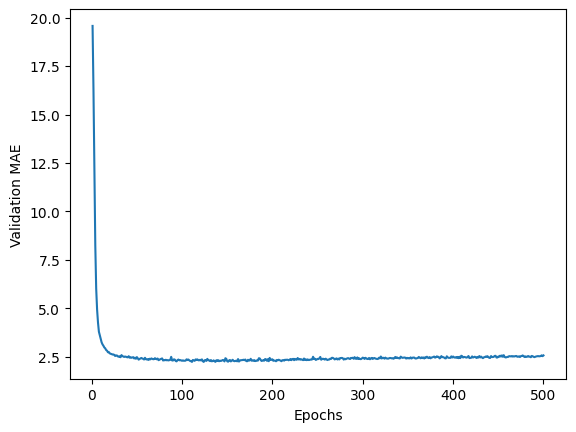

In [69]:
plt.plot(range(1, len(average_mae_history)+1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

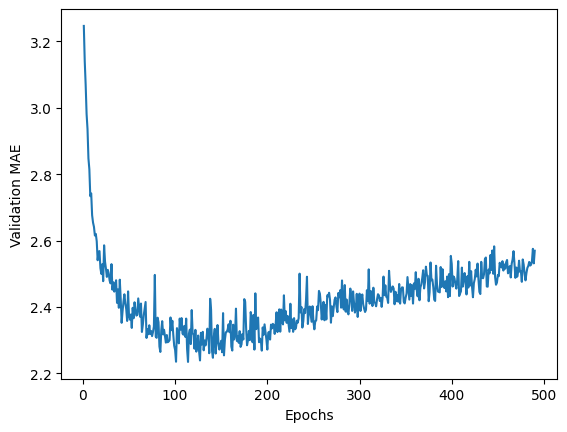

In [70]:
truncated_mae_history = average_mae_history[10:]
plt.plot(range(1, len(truncated_mae_history)+1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

# Validation MAE stops impproving significantly after 120-140 epochs

In [71]:
model = build_model()
model.fit(train_data, train_targets, epochs = 130, batch_size = 16, verbose = 0)

test_mse_score, test_mae_score = model.evaluate(test_data,  test_targets)
print(f"test_mse_score: {test_mse_score:.4f}")
print(f"test_mae_score: {test_mae_score:.4f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 11.7872 - mae: 2.3853
test_mse_score: 15.5985
test_mae_score: 2.5577


In [72]:
predictions = model.predict(test_data)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


In [73]:
predictions[10]

array([21.77156], dtype=float32)

In [74]:
test_targets[10]

np.float64(18.6)